In [4]:
print("\n2. Display Last 10 Rows:")
print(data.tail(10))



2. Display Last 10 Rows:
        duration protocol_type service flag  src_bytes  dst_bytes  land  \
494010         0           tcp    http   SF        308        662     0   
494011         0           tcp    http   SF        291       1862     0   
494012         0           tcp    http   SF        289        244     0   
494013         0           tcp    http   SF        306        662     0   
494014         0           tcp    http   SF        289       1862     0   
494015         0           tcp    http   SF        310       1881     0   
494016         0           tcp    http   SF        282       2286     0   
494017         0           tcp    http   SF        203       1200     0   
494018         0           tcp    http   SF        291       1200     0   
494019         0           tcp    http   SF        219       1234     0   

        wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
494010               0       0    0  ...                 255   
494011              

In [5]:
print("\n3. Number of Rows and Columns:")
print(data.shape)



3. Number of Rows and Columns:
(494020, 42)


In [47]:
import pandas as pd

# Assuming 'data' is your DataFrame
data_types_count = data.dtypes.value_counts().reset_index()
data_types_count.columns = ['Data Type', 'Count']

# Display the data types and their counts in a table
print("\n4. Data Types:")
print(data_types_count)



4. Data Types:
  Data Type  Count
0     int64     23
1   float64     15
2    object      4


In [13]:
import pandas as pd

# Assuming 'data' is your DataFrame
expected_data_types = {
    'column1': int,
    'column2': str,
    'column3': float,
    # Add more columns and their expected data types as needed
}

# Get the actual data types of the columns
actual_data_types = data.dtypes

# Get common columns between expected and actual data types
common_columns = actual_data_types.index.intersection(expected_data_types.keys())

# Cross-check the data types for common columns
cross_check_result = actual_data_types[common_columns].isin(expected_data_types)

# Create a DataFrame to display the results
result_df = pd.DataFrame({
    'Column': common_columns,
    'Expected Type': [expected_data_types[col] for col in common_columns],
    'Actual Type': actual_data_types[common_columns],
    'Match': cross_check_result.values
})

# Print the mismatched columns in the correlated table
mismatched_columns = result_df[~result_df['Match']]
if not mismatched_columns.empty:
    print("Mismatched columns:")
    print(mismatched_columns)
else:
    print("All data types match the expected data types.")


All data types match the expected data types.


In [21]:
# Missing Value Analysis
missing_values = df.isnull().sum()
missing_cols = missing_values[missing_values > 0]


# Print missing value analysis in a sentence
if missing_cols.empty:
    print("No missing values found in the dataset.")
else:
    print("Missing values were found in the following columns:", ', '.join(missing_cols.index))
    



No missing values found in the dataset.


In [29]:
from scipy import stats

# Calculate z-scores for numerical columns
z_scores = stats.zscore(df.select_dtypes(include='number'))

# Find rows with outliers (where z-score > 3 for any numerical column)
outliers = (z_scores > 3).any(axis=1)

# Count the number of outliers
outlier_count = outliers.sum()

# Print the count of outliers in a sentence
print(f"\n6. Number of Outliers Detected: {outlier_count}")

# Handle outliers (e.g., replace them with the median of each column)
if outlier_count > 0:
    numerical_columns = df.select_dtypes(include='number')
    for column in numerical_columns:
        median = df[column].median()
        df.loc[outliers, column] = median

# Print the DataFrame after handling outliers (if applicable)
print("\nDataFrame after handling outliers:")
print(df)



6. Number of Outliers Detected: 50931

DataFrame after handling outliers:
        duration protocol_type service flag  src_bytes  dst_bytes  land  \
0              0           tcp    http   SF        181       5450     0   
1              0           tcp    http   SF        239        486     0   
2              0           tcp    http   SF        235       1337     0   
3              0           tcp    http   SF        219       1337     0   
4              0           tcp    http   SF        217       2032     0   
...          ...           ...     ...  ...        ...        ...   ...   
494015         0           tcp    http   SF        310       1881     0   
494016         0           tcp    http   SF        282       2286     0   
494017         0           tcp    http   SF        203       1200     0   
494018         0           tcp    http   SF        291       1200     0   
494019         0           tcp    http   SF        219       1234     0   

        wrong_fragment  

In [39]:
df.corr()


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,...,label_phf,label_pod,label_portsweep,label_rootkit,label_satan,label_smurf,label_spy,label_teardrop,label_warezclient,label_warezmaster
duration,1.000000,0.001052,0.008513,NaN,NaN,NaN,-0.000457,NaN,0.026936,0.057058,...,-0.000058,-0.000470,-0.000933,0.002639,-0.001154,-0.023307,0.030389,-0.000905,0.000177,-0.000129
src_bytes,0.001052,1.000000,0.036907,NaN,NaN,NaN,0.230135,NaN,0.049203,0.220718,...,-0.000091,-0.000739,-0.001472,-0.000222,-0.001930,-0.003156,-0.000093,-0.001426,-0.001303,-0.000227
dst_bytes,0.008513,0.036907,1.000000,NaN,NaN,NaN,0.183019,NaN,0.462306,0.178544,...,-0.000502,-0.004076,-0.008096,0.000182,-0.010013,-0.202272,-0.000040,-0.007855,-0.008018,-0.000179
land,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wrong_fragment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
label_smurf,-0.023307,-0.003156,-0.202272,NaN,NaN,NaN,-0.073119,NaN,-0.434681,-0.069627,...,-0.003265,-0.026535,-0.052707,-0.005163,-0.065186,1.000000,-0.002309,-0.051135,-0.052197,-0.007302
label_spy,0.030389,-0.000093,-0.000040,NaN,NaN,NaN,-0.000128,NaN,-0.000762,-0.000122,...,-0.000006,-0.000047,-0.000092,-0.000009,-0.000114,-0.002309,1.000000,-0.000090,-0.000092,-0.000013
label_teardrop,-0.000905,-0.001426,-0.007855,NaN,NaN,NaN,-0.002839,NaN,-0.016879,-0.002704,...,-0.000127,-0.001030,-0.002047,-0.000200,-0.002531,-0.051135,-0.000090,1.000000,-0.002027,-0.000284
label_warezclient,0.000177,-0.001303,-0.008018,NaN,NaN,NaN,-0.002898,NaN,0.024098,-0.002760,...,-0.000129,-0.001052,-0.002089,-0.000205,-0.002584,-0.052197,-0.000092,-0.002027,1.000000,-0.000289


In [48]:
import pandas as pd

# Load your DataFrame, df
# For example, you can load a CSV file like this:
# df = pd.read_csv("your_data.csv")

# Identify categorical columns (you need to customize this based on your DataFrame)
categorical_columns = df.select_dtypes(include=['object']).columns

# Perform one-hot encoding
df = pd.get_dummies(df, columns=categorical_columns)
print(df)

# Now, the categorical columns have been one-hot encoded into binary columns.

# You can use df for further analysis or modeling.


        duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0              0        181       5450     0               0       0    0   
1              0        239        486     0               0       0    0   
2              0        235       1337     0               0       0    0   
3              0        219       1337     0               0       0    0   
4              0        217       2032     0               0       0    0   
...          ...        ...        ...   ...             ...     ...  ...   
494015         0        310       1881     0               0       0    0   
494016         0        282       2286     0               0       0    0   
494017         0        203       1200     0               0       0    0   
494018         0        291       1200     0               0       0    0   
494019         0        219       1234     0               0       0    0   

        num_failed_logins  logged_in  lnum_compromised  ...  \
0           

In [6]:
print(categorical_columns)

NameError: name 'categorical_columns' is not defined

In [50]:
print("\n9. Descriptive Statistics:")
print(df.describe())


9. Descriptive Statistics:
            duration     src_bytes      dst_bytes      land  wrong_fragment  \
count  494020.000000  4.940200e+05  494020.000000  494020.0        494020.0   
mean        0.200773  9.748508e+02     477.764394       0.0             0.0   
std         9.885129  1.421133e+04    2710.470986       0.0             0.0   
min         0.000000  0.000000e+00       0.000000       0.0             0.0   
25%         0.000000  2.390000e+02       0.000000       0.0             0.0   
50%         0.000000  5.200000e+02       0.000000       0.0             0.0   
75%         0.000000  1.032000e+03       0.000000       0.0             0.0   
max      2147.000000  2.194619e+06   99511.000000       0.0             0.0   

         urgent            hot  num_failed_logins      logged_in  \
count  494020.0  494020.000000           494020.0  494020.000000   
mean        0.0       0.007947                0.0       0.125481   
std         0.0       0.124722                0.0       

In [58]:
# 10. Count the values for each attribute
# For categorical variables
categorical_columns = df.select_dtypes(include='object')
for column in categorical_columns:
    print(f"\nValue Counts for {column}:")
    print(df[column].value_counts())

# For numerical variables
numerical_columns = df.select_dtypes(include='number')
for column in numerical_columns:
    print(f"\nValue Counts for {column}:")
    print(df[column].value_counts())


Value Counts for duration:
duration
0      490457
1         647
5         433
3         308
2         307
        ...  
338         1
568         1
412         1
260         1
120         1
Name: count, Length: 241, dtype: int64

Value Counts for src_bytes:
src_bytes
1032     228030
520      103705
0         86417
105        7224
54540      1879
          ...  
2927          1
873           1
1422          1
2028          1
475           1
Name: count, Length: 2592, dtype: int64

Value Counts for dst_bytes:
dst_bytes
0        424379
147        2408
146        2222
8314       1868
145         955
          ...  
4989          1
10406         1
24799         1
37926         1
13828         1
Name: count, Length: 10058, dtype: int64

Value Counts for land:
land
0    494020
Name: count, dtype: int64

Value Counts for wrong_fragment:
wrong_fragment
0    494020
Name: count, dtype: int64

Value Counts for urgent:
urgent
0    494020
Name: count, dtype: int64

Value Counts for hot:
hot
0    49

In [10]:
import pandas as pd

# Define your dependent variable
dependent_variable = 'label'

# Define your independent variables as a list
independent_variables = ['duration', 'protocol_type', 'service']

# Create a DataFrame for the counts
variable_counts = pd.DataFrame({
    'Variable Type': ['Dependent', 'Independent'],
    'Count': [1, len(independent_variables)]
})

# Print the table
print(variable_counts)
print(dependent_variable)
print(independent_variables)

  Variable Type  Count
0     Dependent      1
1   Independent      3
label
['duration', 'protocol_type', 'service']


In [15]:
import pandas as pd

# Load your DataFrame into the variable 'df' here, for example:
df = pd.read_csv("C:\\Users\\Varsha A\\Downloads\\New.csv")

# Replace 'your_dependent_variable_name' with the name of your dependent variable
dependent_var = 'label'

# Get the list of all columns (variables)
all_columns = df.columns

# Separate columns into dependent and independent
independent_vars = [col for col in all_columns if col != dependent_var]

# Print the number of dependent and independent variables
num_dependent_vars = 1
num_independent_vars = len(independent_vars)

print(f"Number of Dependent Variables: {num_dependent_vars}")
print(f"Number of Independent Variables: {num_independent_vars}")



Number of Dependent Variables: 1
Number of Independent Variables: 41


In [40]:
import pandas as pd

# Replace these with your actual variable names and DataFrame
dependent_var = 'label'  # Replace with your dependent variable column name
independent_var = 'duration'  # Replace with your independent variable column name


# Create a cross-tabulation table
cross_tab = pd.crosstab(df[independent_var], df[dependent_var])

# Display the cross-tabulation
print(cross_tab)


label     back  buffer_overflow  ftp_write  guess_passwd  imap  ipsweep  land  \
duration                                                                        
0         2163                8          4            49    10     1238    21   
1            7                0          0             1     0        0     0   
2            3                0          0             0     0        3     0   
3            0                0          0             0     0        0     0   
4            2                0          0             0     0        0     0   
...        ...              ...        ...           ...   ...      ...   ...   
40929        0                0          0             0     0        0     0   
41065        0                0          0             0     0        0     0   
42088        0                0          0             0     0        0     0   
42448        0                0          0             0     0        0     0   
58329        0              

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Replace these with your actual variable names
dependent_var = 'hot'
categorical_independent_var = 'duration'

# Filter the DataFrame to include only numerical values for both groups
group_1 = df[df[categorical_independent_var] == 0].select_dtypes(include='number')[dependent_var]
group_2 = df[df[categorical_independent_var] == 1].select_dtypes(include='number')[dependent_var]

# Perform the t-test
t_stat, p_value = stats.ttest_ind(group_1, group_2)

# Create a data frame to display the results in a table
results = pd.DataFrame({'Statistic': ['t-statistic', 'P-value'],
                        'Value': [t_stat, p_value]})

# Print the results as a table
print(results)


     Statistic       Value
0  t-statistic -129.372264
1      P-value    0.000000


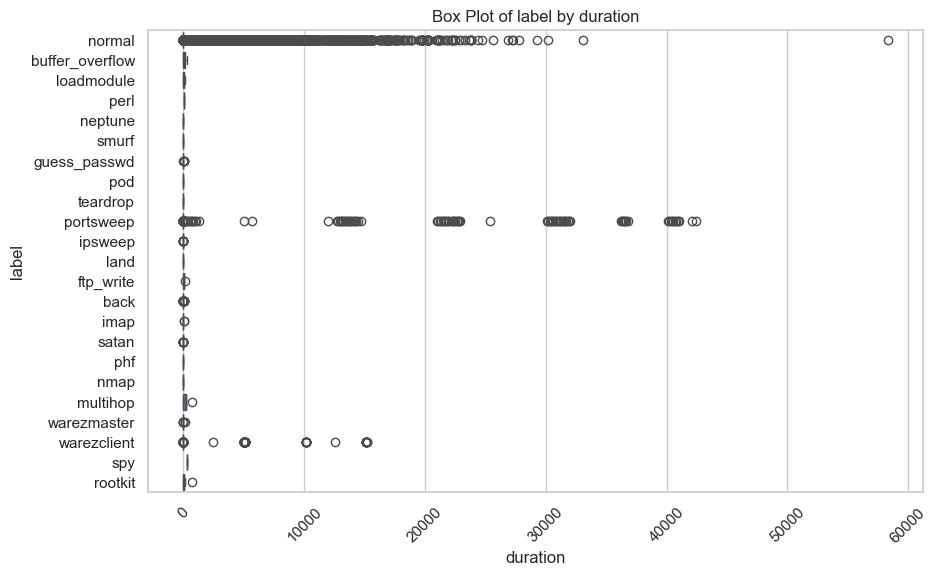

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace these with your actual variable names
dependent_var = 'label'
categorical_independent_var = 'duration'

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=categorical_independent_var, y=dependent_var, data=df)
plt.xlabel(categorical_independent_var)
plt.ylabel(dependent_var)
plt.title(f'Box Plot of {dependent_var} by {categorical_independent_var}')
plt.xticks(rotation=45)
plt.show()


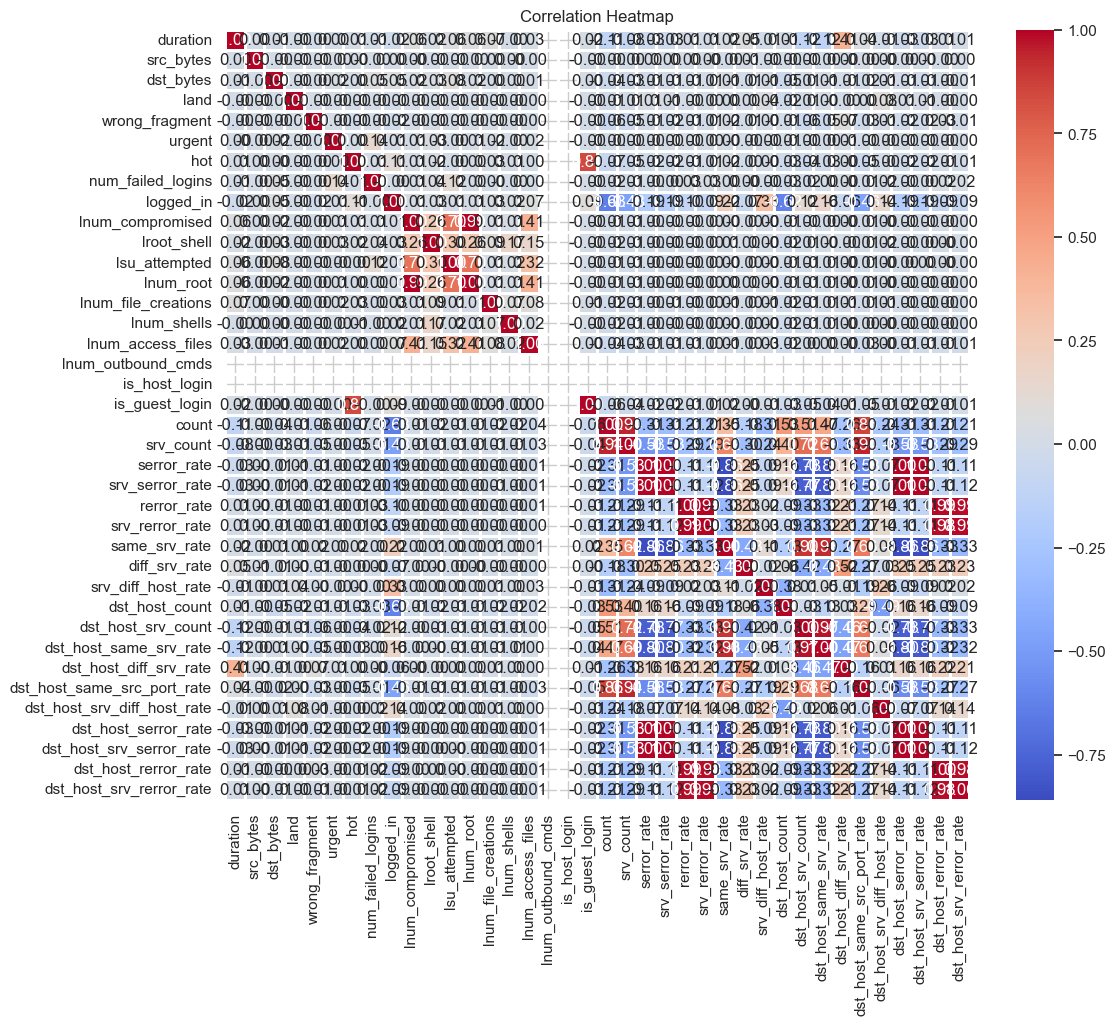

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data (replace 'your_data.csv' with your file)
# df = pd.read_csv('your_data.csv')

# Select only numeric columns for the correlation matrix
numeric_columns = df.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)
plt.title("Correlation Heatmap")
plt.show()


In [2]:
data.corr()

NameError: name 'data' is not defined

AttributeError: 'DataFrame' object has no attribute 'append'

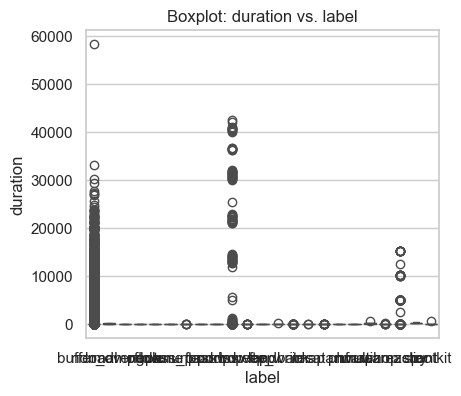

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency

# Load your data (replace 'your_data.csv' with your file)
# df = pd.read_csv('your_data.csv')

# Replace these with your actual variable names
dependent_var = 'label'
independent_vars = df.columns[df.columns != dependent_var]

# Create a DataFrame to store p-square values
p_square_df = pd.DataFrame(columns=['Method', 'Independent Variable', 'P-Square Value'])

# Bivariate analysis with Boxplot and t-test
for independent_var in independent_vars:
    if df[independent_var].dtype == 'object':
        # Skip non-numeric variables
        continue

    # Create subplots for Boxplot and t-test
    plt.figure(figsize=(10, 4))

    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(x=dependent_var, y=independent_var, data=df)
    plt.title(f'Boxplot: {independent_var} vs. {dependent_var}')

    # t-test
    group_1 = df[df[dependent_var] == 0][independent_var]
    group_2 = df[df[dependent_var] == 1][independent_var]
    t_stat, p_value = ttest_ind(group_1, group_2)

    # Store p-square value for Boxplot
    p_square_df = p_square_df.append({'Method': 'Boxplot', 'Independent Variable': independent_var, 'P-Square Value': p_value ** 2}, ignore_index=True)

    # Print t-test results
    print(f't-test results for {independent_var} vs. {dependent_var}:')
    print(f"t-statistic: {t_stat}")
    print(f"P-value: {p_value}")
    plt.subplot(1, 2, 2)
    sns.barplot(x=['t-statistic', 'P-value'], y=[t_stat, p_value])
    plt.title(f't-Test for {independent_var} vs. {dependent_var}')

    plt.tight_layout()
    plt.show()

# Bivariate analysis with Crosstab and Chi-square test
for independent_var in independent_vars:
    if df[independent_var].dtype == 'object':
        # Skip non-numeric variables
        continue

    # Create contingency table
    contingency_table = pd.crosstab(df[independent_var], df[dependent_var])

    # Perform the chi-squared test
    chi2, p, _, _ = chi2_contingency(contingency_table)

    # Store p-square value for Chi-squared test
    p_square_df = p_square_df.append({'Method': 'Chi-squared', 'Independent Variable': independent_var, 'P-Square Value': p ** 2}, ignore_index=True)

    # Print chi-squared test results
    print(f'Chi-squared test results for {independent_var} vs. {dependent_var}:')
    print(f"Chi-squared statistic: {chi2}")
    print(f"P-value: {p}")

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Calculate p-square for correlation matrix heatmap
for independent_var in independent_vars:
    if df[independent_var].dtype == 'object':
        # Skip non-numeric variables
        continue

    # Calculate the correlation coefficient
    correlation_coefficient = correlation_matrix[dependent_var][independent_var]

    # Store p-square value for Correlation Matrix Heatmap
    p_square_df = p_square_df.append({'Method': 'Correlation Matrix', 'Independent Variable': independent_var, 'P-Square Value': correlation_coefficient ** 2}, ignore_index=True)

# Print p-square values for all methods
print(p_square_df)


In [53]:
# chi square
for numerical_var in ['duration', 'dst_bytes', 'src_bytes', 'land',
       'urgent', 'hot']:
    crosstab = pd.crosstab(df[numerical_var], df['label'])

    chi2, p, dof, expected = stats.chi2_contingency(crosstab)

    print("Chi-square statistic:", chi2)
    print("P-value:", p)
    print("Degrees of freedom:", dof)
    print("Expected frequencies table:")
    print(expected)
    print("\n")

Chi-square statistic: 1228975.5052257054
P-value: 0.0
Degrees of freedom: 54868
Expected frequencies table:
[[2.14792723e+03 2.92500304e+01 7.80000810e+00 ... 9.54525991e+02
  9.94501032e+02 1.95000202e+01]
 [1.10413101e+01 1.50358285e-01 4.00955427e-02 ... 4.90669204e+00
  5.11218169e+00 1.00238857e-01]
 [3.87962026e+00 5.28318692e-02 1.40884984e-02 ... 1.72408000e+00
  1.79628355e+00 3.52212461e-02]
 ...
 [4.45933363e-03 6.07262864e-05 1.61936764e-05 ... 1.98170115e-03
  2.06469374e-03 4.04841909e-05]
 [4.45933363e-03 6.07262864e-05 1.61936764e-05 ... 1.98170115e-03
  2.06469374e-03 4.04841909e-05]
 [4.45933363e-03 6.07262864e-05 1.61936764e-05 ... 1.98170115e-03
  2.06469374e-03 4.04841909e-05]]


Chi-square statistic: 3614692.037292882
P-value: 0.0
Degrees of freedom: 235928
Expected frequencies table:
[[1.82055863e+03 2.47919922e+01 6.61119793e+00 ... 8.09045346e+02
  8.42927736e+02 1.65279948e+01]
 [2.22966682e-02 3.03631432e-04 8.09683818e-05 ... 9.90850573e-03
  1.03234687e-02 

In [51]:
# Check the column names in your DataFrame
print(df.columns)


Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'lnum_compromised', 'lroot_shell',
       'lsu_attempted', 'lnum_root', 'lnum_file_creations', 'lnum_shells',
       'lnum_access_files', 'lnum_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')


In [54]:
from tabulate import tabulate

# Create an empty list to store the results
results = []

for numerical_var in ['duration', 'dst_bytes', 'src_bytes', 'land', 'urgent', 'hot']:
    crosstab = pd.crosstab(df[numerical_var], df['label'])

    chi2, p, dof, expected = stats.chi2_contingency(crosstab)

    # Append the results to the list
    results.append([numerical_var, chi2, p, dof, expected])

# Define the headers for the table
headers = ["Numerical Variable", "Chi-square statistic", "P-value", "Degrees of Freedom", "Expected Frequencies"]

# Use tabulate to format and print the table
print(tabulate(results, headers, tablefmt="fancy_grid"))


╒══════════════════════╤════════════════════════╤═══════════╤══════════════════════╤═══════════════════════════════════════════════════════════════════╕
│ Numerical Variable   │   Chi-square statistic │   P-value │   Degrees of Freedom │ Expected Frequencies                                              │
╞══════════════════════╪════════════════════════╪═══════════╪══════════════════════╪═══════════════════════════════════════════════════════════════════╡
│ duration             │            1.22898e+06 │         0 │                54868 │ [[2.14792723e+03 2.92500304e+01 7.80000810e+00 ... 9.54525991e+02 │
│                      │                        │           │                      │   9.94501032e+02 1.95000202e+01]                                  │
│                      │                        │           │                      │  [1.10413101e+01 1.50358285e-01 4.00955427e-02 ... 4.90669204e+00 │
│                      │                        │           │                     

In [58]:


# a. Fetch basic information
basic_info = df.info()

# b. Get the count of quantitative, qualitative, nominal, and categorical data
# Quantitative data (numerical)
quantitative_data = df.select_dtypes(include=['int64', 'float64'])
quantitative_count = len(quantitative_data.columns)

# Qualitative data (non-numerical)
qualitative_data = df.select_dtypes(exclude=['int64', 'float64'])
qualitative_count = len(qualitative_data.columns)

# Nominal data (categorical but with no specific order)
nominal_data = df.select_dtypes(include=['object'])
nominal_count = len(nominal_data.columns)

# c. Display descriptive statistics
descriptive_stats = df.describe()

# d. Check for duplicate values
duplicates = df[df.duplicated()]


# f. Check for null or missing values
null_values = df.isnull().sum()

# g. Know data types of all attributes
data_types = df.dtypes

# Print or display the results
print("a. Basic Information:")
print(basic_info)

print("\nb. Count of Data Types:")
print(f"Quantitative (Numerical) Data: {quantitative_count} columns")
print(f"Qualitative (Non-Numerical) Data: {qualitative_count} columns")
print(f"Nominal Data (Categorical): {nominal_count} columns")

print("\nc. Descriptive Statistics:")
print(descriptive_stats)

print("\nd. Duplicate Values:")
print(duplicates)


print("\nf. Null or Missing Values:")
print(null_values)

print("\ng. Data Types of All Attributes:")
print(data_types)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  object 
 2   service                      494020 non-null  object 
 3   flag                         494020 non-null  object 
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  lnum_compromised             494020 non-null  int64  
 13 

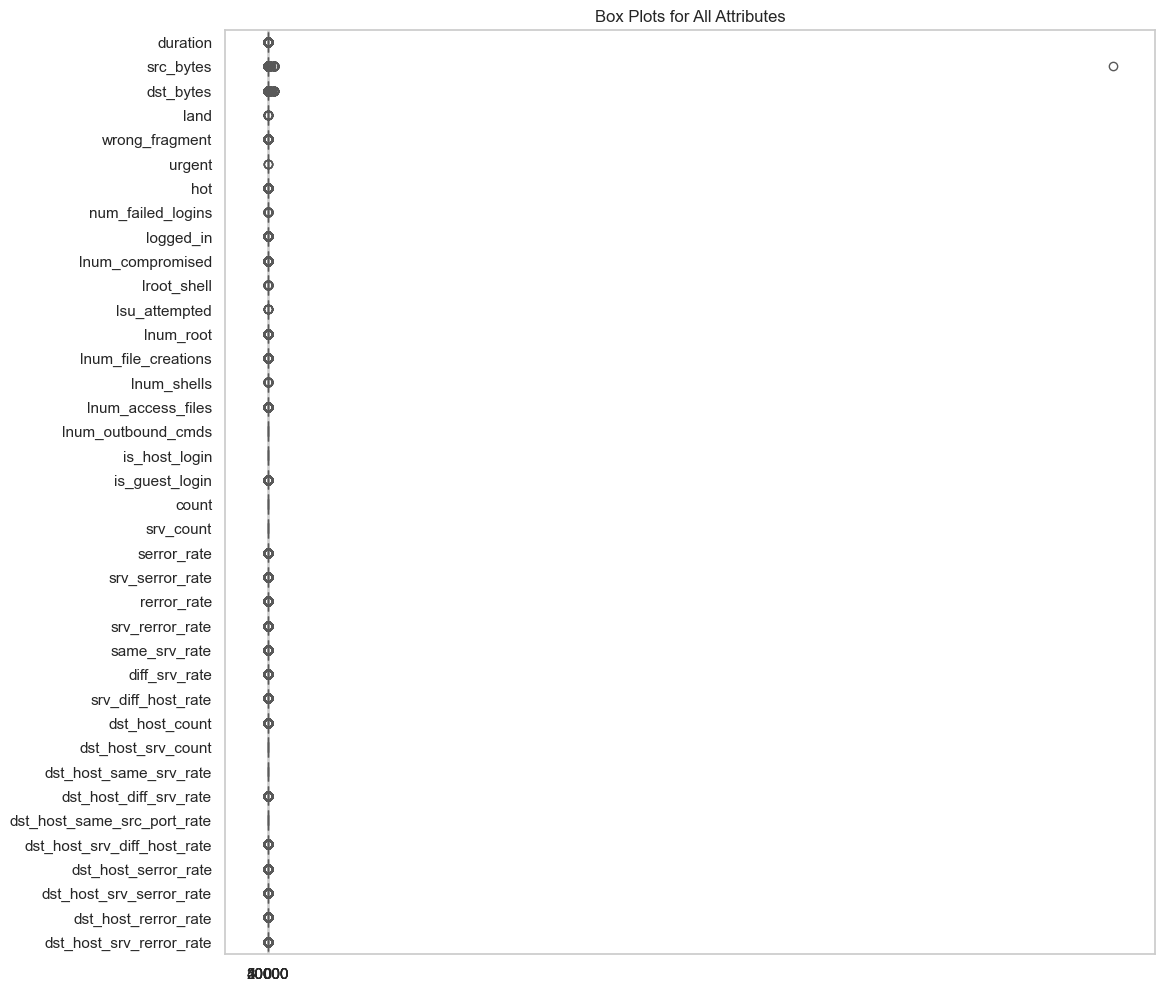

In [59]:
plt.figure(figsize=(12, 12))
sns.boxplot(data=data, orient="h", palette="Set2")
plt.title("Box Plots for All Attributes")
plt.xticks(ticks=[10000 * i for i in range(6)], labels=[str(10000 * i) for i in range(6)])
plt.show()

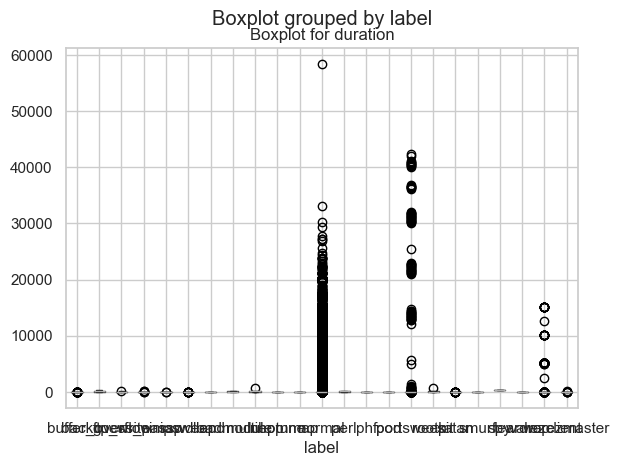

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

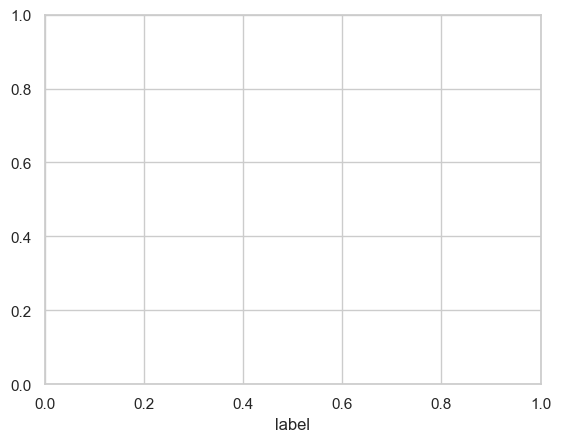

In [63]:
import matplotlib.pyplot as plt

for column in independent_variables:
    data.boxplot(column=column, by=dependent_variable)
    plt.title(f'Boxplot for {column}')
    plt.show()


In [64]:
from scipy import stats

for column in independent_variables:
    t_stat, p_value = stats.ttest_ind(data[data[dependent_variable] == 0][column], data[data[dependent_variable] == 1][column])
    print(f"t-test for {column}: t-statistic={t_stat}, p-value={p_value}")


t-test for duration: t-statistic=nan, p-value=nan
t-test for protocol_type: t-statistic=nan, p-value=nan
t-test for service: t-statistic=nan, p-value=nan
t-test for flag: t-statistic=nan, p-value=nan
t-test for src_bytes: t-statistic=nan, p-value=nan
t-test for dst_bytes: t-statistic=nan, p-value=nan
t-test for land: t-statistic=nan, p-value=nan
t-test for wrong_fragment: t-statistic=nan, p-value=nan
t-test for urgent: t-statistic=nan, p-value=nan
t-test for hot: t-statistic=nan, p-value=nan
t-test for num_failed_logins: t-statistic=nan, p-value=nan
t-test for logged_in: t-statistic=nan, p-value=nan
t-test for lnum_compromised: t-statistic=nan, p-value=nan
t-test for lroot_shell: t-statistic=nan, p-value=nan
t-test for lsu_attempted: t-statistic=nan, p-value=nan
t-test for lnum_root: t-statistic=nan, p-value=nan
t-test for lnum_file_creations: t-statistic=nan, p-value=nan
t-test for lnum_shells: t-statistic=nan, p-value=nan
t-test for lnum_access_files: t-statistic=nan, p-value=nan
t-t

In [68]:
cross_tab = pd.crosstab(data['duration'], data['label'])
print(cross_tab)


label     back  buffer_overflow  ftp_write  guess_passwd  imap  ipsweep  land  \
duration                                                                        
0         2163                8          4            49    10     1238    21   
1            7                0          0             1     0        0     0   
2            3                0          0             0     0        3     0   
3            0                0          0             0     0        0     0   
4            2                0          0             0     0        0     0   
...        ...              ...        ...           ...   ...      ...   ...   
40929        0                0          0             0     0        0     0   
41065        0                0          0             0     0        0     0   
42088        0                0          0             0     0        0     0   
42448        0                0          0             0     0        0     0   
58329        0              

In [69]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")


Chi-square value: 1228975.5052257054
P-value: 0.0


In [80]:
import pandas as pd

# Load your data (replace 'your_data.csv' with your file)
# df = pd.read_csv('your_data.csv')

# Select only numeric columns for the correlation matrix
numeric_columns = df.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr()

# Print the correlation matrix as a table
print(correlation_matrix)


                             duration  src_bytes  dst_bytes      land  \
duration                     1.000000   0.004258   0.005440 -0.000452   
src_bytes                    0.004258   1.000000  -0.000002 -0.000020   
dst_bytes                    0.005440  -0.000002   1.000000 -0.000175   
land                        -0.000452  -0.000020  -0.000175  1.000000   
wrong_fragment              -0.003235  -0.000139  -0.001254 -0.000318   
urgent                       0.003786  -0.000005   0.016288 -0.000017   
hot                          0.013213   0.004483   0.004365 -0.000295   
num_failed_logins            0.005239  -0.000027   0.049330 -0.000065   
logged_in                   -0.017265   0.001701   0.047814 -0.002784   
lnum_compromised             0.058095   0.000119   0.023298 -0.000038   
lroot_shell                  0.021340  -0.000022   0.031680 -0.000070   
lsu_attempted                0.055853  -0.000010   0.075656 -0.000031   
lnum_root                    0.056766  -0.000010   

In [5]:
import seaborn as sns
dependent_variable = 'duartion'
independent_variables = df.columns.to_list()
independent_variables.remove(dependent_variable)

# Create a crosstab for each independent variable with the dependent variable
sns.heatmap(data=pd.crosstab(df[dependent_variable], df[independent_variable]), annot=True)

# Add a title and axis labels to the plot
plt.title('Crosstab of Dependent Variable by Independent Variables')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')

# Show the plot
plt.show()

NameError: name 'df' is not defined